In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
class pages:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.page_id=self.get_ids(d)
        self.title_part1=self.get_title_part1(d)
        self.title_part2=self.get_title_part2(d)
        self.short_description=self.get_short_description(d)
        self.description=self.get_description(d)
        self.create_df()
    
    def get_ids(self, x):
        res=[]
        for i in range(len(x)):
            res.append(int(x[i]["id"]))
        return res
    
    def get_title_part1(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part1"])
        return res
    
    def get_title_part2(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def get_short_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description_short"])
        return res
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def create_df(self):
        dd={}
        dd["page_id"]=self.page_id
        dd["title_part1"]=self.title_part1
        dd["title_part2"]=self.title_part2
        dd["short_description"]=self.short_description
        dd["description"]=self.description
        self.df=pd.DataFrame(dd)

In [3]:
page=pages("page.json", "page")
page_df=page.df

In [4]:
page_df.head()

,page_id,title_part1,title_part2,short_description,description
0,3257,Expert Advice on Creating,The Ideal CV Layout,The importance of the CV layout cannot be unde...,<p>The importance of your&nbsp;CV layout canno...
1,2693,Linda Jones on,Female Diversity,Linda Jones speaks about the Sky initiative to...,<p>Linda Jones discusses Project Sky and outli...
2,3405,Sector:,Accounting & Finance,Apply for accounting & finance internships at ...,<h1><em>Which&nbsp;location do you want to wor...
3,233,Top Skills to Excel,In the Technology Sector,,<p>You don&#39;t have to be a world class prog...
4,87,Top Five Tips for,Creating a Successful Brand,,<p>There are misconceptions about how importan...


In [5]:
page_df.shape

(2529, 5)

In [6]:
content=page_df["description"].values

In [7]:
part_1=page_df["title_part1"].values

In [8]:
part_2=page_df["title_part2"].values

In [9]:
title=[]
for i in range(len(part_1)):
    title.append(part_1[i]+" "+part_2[i])

In [10]:
short_description=page_df["short_description"].values

In [11]:
def remove_pages(content):
    res=True
    if len(content)<10:
        res=False
    return res

In [12]:
def clean_page(title, content):
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&amp;","").replace("&middot;","")
    content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
    content=re.sub('<.*?>','',content , flags=re.DOTALL)
    res=title+"\r\n "+content
    res=res.replace("(","").replace(")","")
    res=res.replace("&rsquo","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    return res

In [13]:
data=[clean_page(title[i], content[i]) for i in range(len(content))]

In [14]:
len(data)

2529

In [15]:
data=[i for i in data if remove_pages(i)]

In [16]:
len(data)

2465

In [17]:
data[0]

'Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready\r\n\r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n '

In [18]:
class jobs:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["job_description"]=self.description
        dd["job_title"]=self.title
        self.df=pd.DataFrame(dd)

In [19]:
job=jobs("job.json", "job")
job_df=job.df

In [20]:
job_df.head()

,job_description,job_title
0,<h2>Overview</h2>\r\n\r\n<p>We are recruiting ...,Systems Engineer Graduate
1,<p>Slaughter and May is one of the most presti...,Training contract
2,"<p>As a Future Leader, you?ll get an unparalle...",Summer Placements
3,<h2>Internships at our international headquart...,International Internship Programme
4,<h2>Description</h2>\r\n\r\n<p>Our Electronics...,Graduate Electronics & Robotics Engineers


In [21]:
job_title=job_df["job_title"].values
job_description=job_df["job_description"].values

In [22]:
def clean_job(title, content):
    content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
    content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
    content=re.sub('<.*?>',' ',content , flags=re.DOTALL)
    res=title+"\r\n "+content
    res=res.replace("(","").replace(")","")
    res=res.replace("&rsquo","").replace("\t","").replace("&ndash;","").replace("\r\n\r\n"," ").replace(" \r\n ","")
    return res

In [23]:
job_data=[clean_job(job_title[i], job_description[i]) for i in range(len(job_description))]

In [24]:
len(job_data)

3954

In [25]:
job_data=[i for i in job_data if remove_pages(i)]

In [26]:
len(job_data)

3954

In [27]:
d=pd.read_csv("data.csv")

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,12,13,14,15,17,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
d.head()

,Unnamed: 0,user_id,job_created_date,job_application_status,job_id,employer_id,job_opening_date,job_closing_date,job_short_description,job_description,...,course_includes_industrial_placement,graduation_year,right_to_work_uk,degree_subject_id,university_id,university_name,university_type,degree_subject_name,degree_subjectgroup_id,degree_subjectgroup_title
0,0,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
1,11,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
2,10,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
3,9,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,26.0,Modern Languages
4,23304,75898.0,2017-09-01 01:00:02,Initiated,214.0,25.0,2017-03-27,2017-08-31,Think of our Summer Vacation Scheme in 2018 as...,<p>Apply now to fast track your application to...,...,False,2019.0,True,1371.0,381.0,University of Manchester,2.0,Spanish and Business,19.0,Business and Management


In [29]:
employer_title=d['employer_title'].values
employer_description=d["employer_description"].values
employer_sector=d["employer_sector_title"].values

In [30]:
def clean_employer(title, content, sector):
    try:
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
        content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
        content=re.sub('<.*?>',' ',content , flags=re.DOTALL)
        res=title+"\r\n "+sector+"\r\n "+content 
        res=res.replace("(","").replace(")","").replace("&ndash;","").replace("\r\r\n\r\r\n","").replace("\r\r\n","")
        res=res.replace("&rsquo;","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    except:
        res=""
    return res

In [31]:
employer_data=[clean_employer(employer_title[i], employer_description[i], employer_sector[i]) for i in range(len(employer_description))]

In [32]:
len(employer_data)

978247

In [33]:
employer_data=[i for i in employer_data if remove_pages(i)]

In [34]:
len(employer_data)

791183

In [35]:
employer_data = list(set(employer_data))

In [36]:
len(employer_data)

829

In [37]:
class success_story:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["content"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title_part2"])
        return res
    
    def create_df(self):
        dd={}
        dd["success_description"]=self.description
        dd["success_title"]=self.title
        self.df=pd.DataFrame(dd)

In [38]:
story=success_story("success_story.json","success_story")
story_df=story.df

In [39]:
story_df.head()

,success_description,success_title
0,<p>Huge congratulations to Nathan who has secu...,Nathan on securing a role with Amazon
1,"<p>This summer, Cambridge student Carmen, will...",Summer Internship at Goldman Sachs
2,<p>We recently caught up with KCL graduate and...,Aysha secures Graduate Role at Deloitte
3,<h2>First things first</h2>\r\n\r\n<p>&middot;...,Commercial Banking - Mid-Markets & SME
4,<p>We caught up with Bright Network member Che...,Life as a consultant at Accenture


In [40]:
story_title=story_df["success_title"].values
story_description=story_df["success_description"].values

In [41]:
def clean_story(title, content):
    try:
        content=content.replace("&nbsp;"," ").replace("&#39;","").replace("&middot;","").replace("&amp;","")
        content=content.replace(".","\r\n ").replace(",","").replace("?","").replace("!","").replace("  "," ")
        content=re.sub('<.*?>',' ',content , flags=re.DOTALL)
        res=title+"\r\n "+content 
        res=res.replace("(","").replace(")","").replace("&ndash;","").replace("\r\r\n\r\r\n","").replace("\r\r\n","")
        res=res.replace("&rsquo;","").replace("\t","").replace("\r\n\r\n","").replace(" \r\n ","")
    except:
        res=""
    return res

In [42]:
story_data=[clean_story(story_title[i], story_description[i]) for i in range(len(story_description))]

In [43]:
len(story_data)

486

In [90]:
class event:
    
    def __init__(self, filename, filtre):
        data=pd.read_json(filename)
        d=data[filtre].values
        self.description=self.get_description(d)
        self.title=self.get_title(d)
        self.create_df()
    
    
    def get_description(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["description"])
        return res
    
    def get_title(self, x):
        res=[]
        for i in range(len(x)):
            res.append(x[i]["title"])
        return res
    
    def create_df(self):
        dd={}
        dd["event_description"]=self.description
        dd["event_title"]=self.title
        self.df=pd.DataFrame(dd)

In [45]:
all_data=data+job_data+employer_data+story_data

In [46]:
len(all_data)

7734

In [47]:
all_data=[i for i in all_data if len(i)>10]

In [48]:
all_data[0]

'Expert Advice on Creating The Ideal CV Layout\r\n The importance of your CV layout cannot be understated Making your CV visually impactful is as vital as the information which it contains\r\n However we understand it is a time consuming and tricky ordeal\r\n Luckily for you our head of Marketing Ben Triggs is at hand to take you through a whirlwind detailed tour\r\n Get those notepads ready\r\n\r\n Some employers dont just request your CV\r\n Sometimes an application form is required and this means adopting a different approach\r\n Find out how to stand out on an employer application form Here\r\n '

In [49]:
def get_data_word2vec(x):
    res=[]
    for document in x:
        sentences=document.split("\r\n")
        for sentence in sentences:
            if len(sentence)>5:
                sentence=sentence.lower()
                sentence=sentence.replace("&pound;","").replace("We;re","we are").replace(";"," ")
                sentence=sentence.replace("We;ll","we will").replace(":"," ").replace("&quot;","")
                sentence = ''.join([i for i in sentence if not i.isdigit()])
                a=sentence.split(" ")
                try:
                    while True:
                        a.remove('')
                except:
                    pass
                res.append(a)
    return res

In [50]:
final_data=get_data_word2vec(all_data)

In [51]:
final_data[10]

['sector', 'accounting', '&', 'finance']

# Word2vec

In [52]:
with open('stopwords.txt') as stopfile:
    stopwords = stopfile.read()
    stop = stopwords.split()

In [53]:
def remove_stopwords(x,y):
    res=[]
    for sentence in x:
        if len(sentence)>1:
            for word in sentence:
                if len(word)>2:
                    if word in y:
                        sentence.remove(word)
                else:
                    sentence.remove(word)
            res.append(sentence)
    return res

In [54]:
sentences=remove_stopwords(final_data, stop)

In [55]:
def create_corpus_file(path, x):
    with open(path, 'w', encoding="UTF-8") as f:
        for item in x:
            a=""
            for i in item:
                a+=i+" "
            a+="\n"
            f.write(a)

In [69]:
create_corpus_file("corpus.txt", sentences)

TypeError: create_corpus_file() got an unexpected keyword argument 'size'

In [71]:
model = Word2Vec(sentences, min_count=2, size=150,
        window=10,
        workers=10)

In [72]:
print(model)

Word2Vec(vocab=25357, size=150, alpha=0.025)


In [73]:
words = list(model.wv.vocab)

In [74]:
words[:10]

['expert',
 'advice',
 'creating',
 'ideal',
 'layout',
 'importance',
 'be',
 'understated',
 'making',
 'your']

In [75]:
model.save('model.bin')

In [76]:
#model = Word2Vec.load('model.bin')

# Visualisation

In [77]:
X = model[model.wv.vocab]

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [78]:
X.shape

(25357, 150)

In [79]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [81]:
print(pca.explained_variance_ratio_)

[0.08609504 0.082348  ]


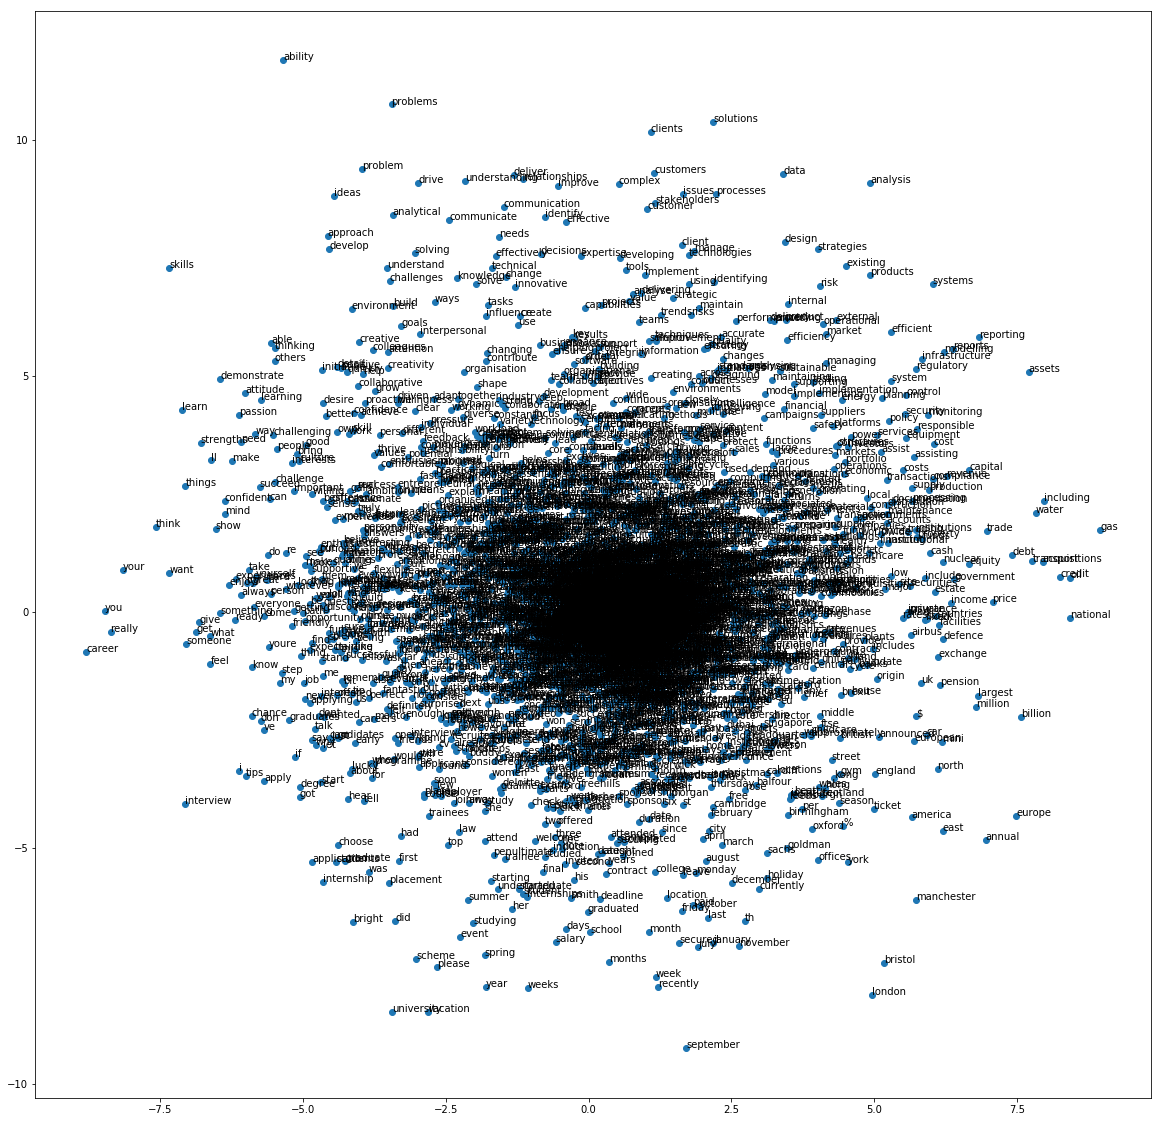

In [89]:
k=5000
plt.figure(figsize=(20,20))
plt.scatter(result[:k, 0], result[:k, 1])
for i, word in enumerate(words[:k]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [86]:
model.wv.most_similar(positive="job")

[('role', 0.5256929397583008),
 ('fast-tracking', 0.5155971050262451),
 ('uk/behaviouralcapabilities', 0.45977282524108887),
 ('position', 0.45724666118621826),
 ('the-job', 0.42199471592903137),
 ('programme', 0.3838546872138977),
 ('vacancy', 0.38221561908721924),
 ('dirty', 0.37831199169158936),
 ('deselected', 0.37823593616485596),
 ('moment', 0.3737249970436096)]

In [87]:
model.wv.most_similar(positive="pwc")

[('deloitte', 0.8629288673400879),
 ('kpmg', 0.7444648742675781),
 ('accenture', 0.6923063397407532),
 ('ey', 0.6607652902603149),
 ('chose', 0.6454571485519409),
 ('chancehaving', 0.6276615858078003),
 ('spoke', 0.6235817670822144),
 ('masons', 0.6222431659698486),
 ('pinsent', 0.6199905872344971),
 ('alpha', 0.6178327798843384)]

In [88]:
model.wv.most_similar(positive="oxford")

[('cambridge', 0.8751017451286316),
 ('queen', 0.8559037446975708),
 ('southampton', 0.8316643834114075),
 ('sheffield', 0.8296505212783813),
 ('bypass', 0.8276926279067993),
 ('manchester', 0.8256450891494751),
 ('bath', 0.8217663764953613),
 ('glasgow', 0.8154594898223877),
 ('liverpool', 0.8147334456443787),
 ('exeter', 0.8137574195861816)]